# Nonparametric Bayesian Learning: 
## An intuitive introduction on the Dirichlet Stochastic Process for clustering
##### Daniele Fakhoury

In a standard Bayesian learning procedure, the goal is to build a model
composed of a set of parameters (or random variables) to suit the target problem and then infer the
posterior of these parameters given observed data. The model’s parameters, which are normally
defined to satisfy known fixed-dimensional probabilistic distributions (e.g., Gaussian, Dirichlet,
gamma, and multinomial distributions), control the data’s goodness-of-fit and the model’s complexity. Thus, inappropriate model parameters may lead to underfitting (i.e., bad goodness-of-fit
but good model complexity) or overfitting (i.e., good goodness-of-fit but bad model complexity)
issues. Since the building blocks of Bayesian learning are fixed-dimensional probabilistic distributions, the number of parameters must be finite; hence the name, Bayesian parametric learning.
Determining or learning the number of these parameters are based on human labour or restarting
the algorithm several times to find the optimal settings a process that is time consuming and not
scalable to large-scale unfamiliar data.
Bayesian nonparametric learning (BNL) advances Bayesian learning in terms of the representation power and modelling flexibility. First, it is necessary to clarify that nonparametric does not
mean “there are no parameters”. In fact, quite the opposite is true. In theory, there are an infinite number of parameters in Bayesian nonparametric models. Therefore, nonparametric means
“there is no need to predefine the dimensionality for the parameters.” Studies on Bayesian nonparametrics began with two papers written by Thomas S. Ferguson in 1973 and Kjell Doksum
in 1974. However, the nonparametric paradigm did not attract much attention from computer
scientists until 2005, when a conference paper titled “Sharing Clusters among Related Groups: Hierarchical Dirichlet Processes” applied Bayesian nonparametrics to machine learning. Due
to the great success of this work, computer scientists began to pay attention to Bayesian nonparametrics, giving rise to BNL. From then onward, BNL became an interdisciplinary subject for
statisticians and computer scientists. Rather than playing with fixed-dimensional probabilistic distributions, BNL is a “game” to play with infinite-dimensional stochastic processes (e.g., Dirichlet,
Gaussian, Poisson, gamma, and negative binomial processes). The benefits are twofold. Stochastic
processes are not restricted by predetermined underlying assumptions about the dimensionality of
the data, which provides a far greater ability to represent the data accurately. Further, BNL builds
probabilistic models with flexible structures that can autonomously adapt to new incoming observations (also known as “letting the data speak”).


## Introduction
More formally, let us start with a set $\{X_1, \dots, X_n\}$ of i.i.d random variables with values on the probability space $\mathcal{X}$ and some observation $x_1, \dots, x_n \in \mathcal{X}$ drown from $X_1,\dots, X_n$. 

In general statistical learning one suppose that we have subspace of all possible distribution (more generally probability measures) on $\mathcal{X}$  
parametrized by a set of parameters $\theta \in \Theta$, a *parametric model* that can explain the *generative* process of our observation:

$$\{P_\theta: \theta \in \Theta\}.$$   

The Bayesian point of view is an approach that takes care of our intuition about probability as degree of belief rather than a frequentist explanation. In a parametric model, we can see probabilities parameters as random variables themself. In the Bayesian approach, in contrast with the frequentist point of view, $\Theta$ itself is a probability space. 
One can query for our belief of the observation given the parameters. This is acceptable even in a frequentist point of view; is the *likelihood*: 
$$P_\theta(x_1, \dots, x_n) = \prod_{i=1}^n P_\theta(x_i).$$

What makes the Bayesian approach different is the opportunity to see the likelihood as a conditioning on the parameter 
$$P(x_i| \theta) = P_\theta(x_i)$$  
and the capacity to set a *prior* distribution on the parameters space $P(\theta)$.

Now Bayes theorem can be applied to invert the conditioning and find the probability of the parameters given the observation; the *posterior*:

$$ P(\theta| x_1, \dots, x_n) \propto P(x_1, \dots, x_n | \theta) \times P(\theta).$$

A Nonparametric Bayesian model is simply a parametric model, with the Bayesian point of view, where the parameters space $\Theta$ is not finite.

##### Definition (Clustering Problem)
Given a set $\{X_1, \dots, X_n\}$ of i.i.d random variables with values on the probability space $\mathcal{X}$ and some observation $x_1, \dots, x_n \in \mathcal{X}$ drown from $X_1,\dots, X_n$.  
The clustering problem is the assignment of $z_i = k \;\; \forall i=1, \dots, n$ and $k$ in a subset of natural number. 

## A generative parametric model for clustering: Mixture of Gaussian

Let us see an example of generative **parametric** model for clustering. The very first thing to do is decide the number of clusters $K$.
Then, fixed $a_1, \dots, a_K$ and $\mu, \Sigma_0$ and $ \Sigma$, one can construct the $x_i$ points using the following procedure:


$$\boldsymbol{\rho} = (\rho_1, \dots, \rho_K) \sim \text{Dirichlet}(a_1,\dots,a_K)  \;\;\;\;\; \;\; \text{this implies  } \sum_{k=1}^K \rho_k = 1 $$

$$ z_i \stackrel{\text{i.i.d}}{\sim} \text{Categorical}( \boldsymbol{\rho}) \;\; \forall i =1,\dots, n $$

$$ \mu_k \stackrel{\text{i.i.d}}{\sim} \mathcal{N}(\mu, \Sigma_0)$$

$$x_i \sim \mathcal{N}(\mu_k, \Sigma).$$ 


This procedure defines a joint distribution on  our variables:

$$ P(\boldsymbol{x}, \boldsymbol{z},\boldsymbol{\mu} ) = \prod_{k=1}^K P(\mu_k) \prod_{i=1}^n P(x_i | \mu_{z_i}) P(z_i).
$$

The $z_i$'s variables are sometimes called *latent* variables because are not directly observable.

A general procedure, once we have the the joint distribution one can infer  the cluster assignment given the observations  using Bayes theorem and a fully Bayesian approach:

$$ P(\boldsymbol{z} | \boldsymbol{x})  = \frac{P(\boldsymbol{x} | \boldsymbol{z}) P(\boldsymbol{z})}{ \sum_\boldsymbol{z} P(\boldsymbol{x} | \boldsymbol{z})}$$

where the likelihood is obtained integrating out $\mu$:

$$ P(\boldsymbol{x} | \boldsymbol{z}) P(\boldsymbol{z}) = \int_{\mu}  P(\boldsymbol{x}, \boldsymbol{z},\boldsymbol{\mu} )  $$ 

and the last integral can be analytically calculated  if $P(\mu)$ and $P(\boldsymbol{x} | \boldsymbol{z})$ are conjugate distribution.

### 2 Clusters
In the $K=2$ setting, the Dirichlet distribution is just the Beta distribution and the Categorical distribution is just the Binomial distribution. Here we can see an example of this generative process for $K=2$.

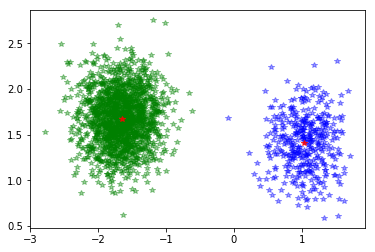

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
colors = ['b*','g*']
Sigma_0 = np.array([[1, 0], [0, 1]])
n_points = 2000
Sigma = np.array([[0.3, 0], [0, 0.3]])
alpha_1 = 1 
alpha_2 = 0.6
mu = [0,0]

# Generate clusters
cluster_center = np.random.multivariate_normal(
    mu, Sigma_0.T.dot(Sigma_0), 2)
rho = np.random.beta(alpha_1, alpha_2, size=1)
for i in range(n_points):  
    z_i = np.random.binomial(1, rho, size=None)[0]
    x_i = np.random.multivariate_normal(
        cluster_center[z_i,:] , Sigma.T.dot(Sigma), 1)
    fig = plt.plot(x_i[:,0], x_i[:,1], colors[z_i], alpha=0.4)
fig = plt.plot(cluster_center[:,0],
         cluster_center[:,1], 'r*', alpha=0.8)
plt.show()

### K Clusters
In the following example we can see the generalization to generic $K$ clusters, using the Dirichlet distribution and the Categorical distribution.

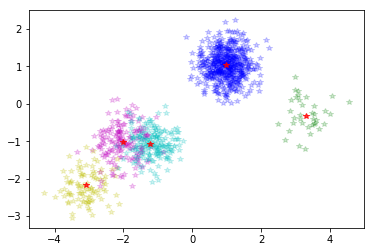

In [21]:
# Parameters
colors = ['b*','g*', 'c*', 'm*', 'y*', 'k*']
n_clusters = 5; n_points = 1000; mu=[0,0]
alpha = np.ones(n_clusters)
Sigma_0 = np.array([[2, 0], [0, 2]])
Sigma = np.array([[0.4, 0], [0, 0.4]])

# Generate clusters
cluster_center = np.random.multivariate_normal(
    mu, Sigma_0.T.dot(Sigma_0), n_clusters)
rho = np.random.dirichlet(alpha, size=1)
for i in range(n_points):
    t = np.random.multinomial(1, rho[0], size=1)
    z_i = np.where(t[0] == 1)[0][0]
    x_i = np.random.multivariate_normal(
        cluster_center[z_i,:] , Sigma.T.dot(Sigma), 1)
    fig =plt.plot(x_i[:,0], x_i[:,1], colors[z_i % 6], alpha=0.2)
fig = plt.plot(cluster_center[:,0], 
         cluster_center[:,1], 'r*', alpha=0.8)

In particular we can see that the distribution of belonging to a given cluster is assigned by the random vector $\rho$ that is a (random) probability distribution on the space of clusters. Here we can see a sample from this random distribution.

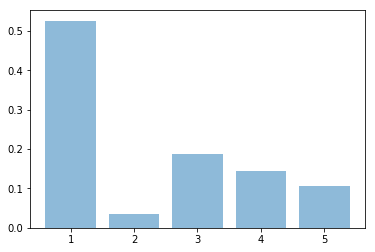

In [22]:
# Plot rho distribution
clusters = np.linspace(1, n_clusters, n_clusters, endpoint=True)
fig = plt.bar(clusters, rho[0], align='center', alpha=0.5)

## A generative nonparametric model for clustering

### The stick breaking

Is not always simple know in advance the number of clusters, or maybe we want a model with a number of clusters that can grow with the number of the observations. We will now define a **non parametric** generative method similar that is in some sense the generalization  of the one above. 
Let us start with an observation on the parametric case with $K$ clusters: the Dirichlet distribution on the $\rho_k$ variables can be seen as follows, using the so called **stick breaking** method:

$$ V_k = \text{Beta}(a_h, \sum_{h=k+1}^K a_h), \;\;\;\;\;\; \rho_k = V_k\prod_{h=1}^{k-1}(1-V_h) \;\;\;  \forall k<K $$
$$ \rho_K = 1 - \sum_{k=1}^{K-1}\rho_k$$

To pass from the parametric case to the nonparametric one, we can simply generalize this procedure without taking care of a fixed number of clusters:

$$ V_k = \text{Beta}(\beta_k, \alpha_k), \;\;\;\;\;\; \rho_k = V_k\prod_{h=1}^{k-1}(1-V_h) \;\;\;  \forall k = 1,2,\dots $$

Where we can choose for the beta distribution only one convenient parameter  ($\beta_k= 1$ and $\alpha_k = \alpha > 0 \; \forall k$) for the sake of simplicity and to ensure that $\sum_{k=1}^\infty\rho_k = 1$ almost surely.

In this case we say that we are performing a **stick breaking Dirichlet process** and that $\boldsymbol{\rho} = (\rho_1,  \rho_2, \dots) \sim \text{GEM}(\alpha)$ distribution named after Griffiths-Engen-McCloskey. 
Practically we have now a distribution over an infinite number of parameters that defines an other distribution.

In [5]:
def GEM(alpha):
    sum = 0; rho= []; n_clusters = 0; prod=1
    while sum < 0.999:
        n_clusters = n_clusters + 1
        V_h = np.random.beta(1, alpha, size=1)
        rho_i = V_h * prod
        prod = prod*(1-V_h)
        rho.append(rho_i[0])
        sum = sum + rho_i[0]
    return rho;

Again the infinite vector $\rho$ is a discrete random probability measure on the space of natural numbers, all possible number of clusters: let us plot a sample of this distribution.

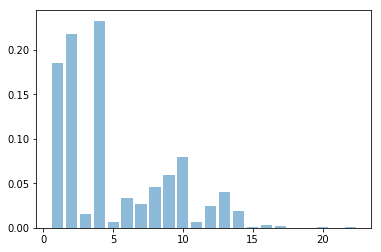

In [6]:
rho = GEM(3)
clusters = np.linspace(1,  len(rho),  len(rho), endpoint=True)
fig = plt.bar(clusters, rho , align='center', alpha=0.5)

## The Dirichlet process
##### Definition (Constructive Dirichlet Process)
Finally, given a distribution $G_0$ on some probability space $\Phi$ and a parameter $\alpha$ we define a Dirichlet process 
$G \sim DP(\alpha, G_0)$ if

$$ G = \sum_{k=1}^\infty \rho_k \mathbb{1}_{\phi_k}, $$

where $$\phi_k \stackrel{\text{i.i.d}}{\sim} G_0 $$ 
and $$\boldsymbol{\rho} \sim GEM(\alpha).$$
<br>

##### Definition (Stochastic Process)
A stochastic process is defined as a collection of random variables defined on a common probability space  $ (\Omega ,{\mathcal {F}},P)$, where $\Omega$  is a sample space, $ {\mathcal {F}}$ is a $\sigma$ -algebra, and  $P$ is a probability measure; and the random variables, indexed by some set  $T$, all take values in the same mathematical space  $S$, which must be measurable with respect to some  $\sigma$ -algebra $\Sigma$ .

In other words, for a given probability space  $ (\Omega ,{\mathcal {F}},P)$ and a measurable space $(S,\Sigma )$, a stochastic process is a collection of $S$-valued random variables, which can be written as:
$${ \{X(t):t\in T\}.}$$

Historically, in many problems from the natural sciences a point $ t\in T$ had the meaning of time, so $X(t)$ is a random variable representing a value observed at time $t$.
<br>

##### Remark
The Dirichlet process $G$ is a stochastic process indexed by the elements of the $\sigma$-algebra of $\Phi$. In other words, for every measurable $A \subset \Phi$, then $G(A)$ is a random variable. 
<br>

##### Definition (Dirichlet Process)
More formally $G$ is a Dirichlet process $G \sim DP(\alpha, G_0) $ if for every finite measurable partition of $\Theta, \; \{A_i\}_{i=1}^n$ then the random vector 

$$ (G(A_1), \dots, G(A_n)) \sim \text{Dirichlet}(\alpha G_0(A_1), \dots, \alpha G_0(A_n)).$$ 

Returning to our generative model in the non parametric setting one has:

$$\boldsymbol{\rho} = (\rho_1, \rho_2, \dots) \sim \text{GEM}(\alpha) $$

$$ z_i \stackrel{\text{i.i.d}}{\sim} \text{Categorical}( \boldsymbol{\rho}) \;\; \forall i =1,\dots, n $$

$$ \mu_k \stackrel{\text{i.i.d}}{\sim} \mathcal{N}(\mu, \Sigma_0)$$

or equivalently, defined the Dirichlet Process
$$ G = \sum_{k=1}^\infty \rho_k \mathbb{1}_{\mu_k} \sim DP(\alpha,  \mathcal{N}(\mu_o, \Sigma_0) ),$$

one can just say:
$$ \mu_k \stackrel{\text{i.i.d}} \sim G,$$

and finally we can draw our observation around the k-th cluster:

$$x_i \sim \mathcal{N}(\mu_k, \Sigma).$$ 

<br>
<br>
Let us now generate clusters according to this non parametric model and take care of relation between how many clusters appears in terms of the number of observations.

num_cluster = 3


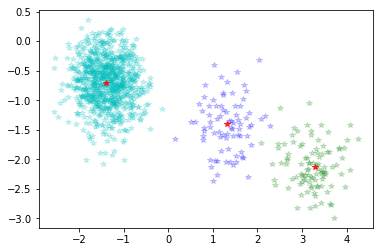

In [10]:
# Parameters
colors = ['b*','g*', 'c*', 'm*', 'y*', 'k*']
n_points = 1000; mu = [0, 0];
Sigma_0 = np.array([[1.6, 0], [0,1.6]]); Sigma = np.array([[0.4, 0], [0, 0.4]])

#Generate cluster and count number of clusters
rho = GEM(0.7)
cluster_visited = np.zeros(len(rho))
visited = np.zeros(n_points)
cluster_center = np.random.multivariate_normal(
    mu, Sigma_0.T.dot(Sigma_0), len(rho))
for i in range(n_points):
    t = np.random.multinomial(1, rho, size=1)
    z_i = np.where(t[0] == 1)[0][0]
    cluster_visited[z_i]=1;
    x_i = np.random.multivariate_normal(
        cluster_center[z_i,:] , Sigma.T.dot(Sigma), 1)
    plt.plot(x_i[:,0], x_i[:,1], colors[z_i % 6], alpha=0.2)
    visited[i]= cluster_visited[cluster_visited == 1].size

plt.plot(cluster_center[cluster_visited==1,0], 
        cluster_center[cluster_visited==1,1], 'r*', alpha=0.8)
print("num_cluster = " + str(cluster_visited[cluster_visited == 1].size))

We cannot deal with an infinite numbers of parameters so we have truncated $G$ when the sum of the probability of the remaining clusters is less than 0.0001 rising in practice in a finite number of possible clusters.

A more convenient way of doing this (and similar observation could be done in all nonparametric Bayesian Learning) is observing that since $\sum_{k=1}^\infty \rho_k= 1$ we can divide the interval $[0,1]$ in infinite number of pieces each one with length $\rho_k$. Now choosing categorically $z_i$ is equivalent to sample a variable $t$ uniformly in $[0,1]$, then $z_i = k$ if the draw of $t$ landed between $\rho_{k-1}$ and $\rho_k$ where $\rho_0 = 0$. 

So we really don't need to know in advance all the infinite number of $\rho_k$ to draw without approximation a finite number of clusters: we can do it dynamically. 

Let us see this in practice:

num_cluster = 6


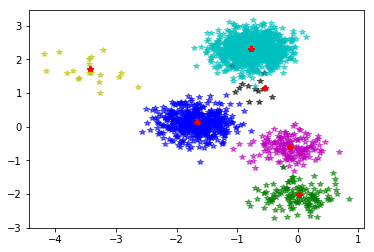

In [15]:
def generate_clusters(n_points, alpha, Sigma_0, mu, Sigma):
    sum = 0; rho= [0]; n_clusters = 0; prod=1
    cluster_center = []; visited_clusters = set([])
    colors = ['b*','g*', 'c*', 'm*', 'y*', 'k*']
    x = [[0,0]]*n_points
    #Generate clusters
    for i in range(n_points):
        t = np.random.uniform(low=0.0, high=1.0, size=None)
        while sum <= t:
            n_clusters = n_clusters + 1
            V_h = np.random.beta(1, alpha, size=1)
            rho_i = V_h * prod
            prod = prod*(1-V_h)
            rho.append(rho_i[0]) 
            sum = sum + rho_i[0]
            cluster_center.append(np.random.multivariate_normal(
                mu, Sigma_0.T.dot(Sigma_0), 1)[0])
        t_sum = 0;
        k=0
        while t_sum <= t:
            t_sum = t_sum + rho[k]
            k = k + 1     
        visited_clusters.add(k-2)    
        z_i = k - 2
        x_i = np.random.multivariate_normal(
            cluster_center[z_i] , Sigma.T.dot(Sigma), 1)
        #print(x_i)
        x[i] = x_i[0]
        plt.plot(x_i[:,0], x_i[:,1], colors[z_i % 6], alpha=0.6)
        plt.plot(cluster_center[z_i][0], 
            cluster_center[z_i][1], 'r*', alpha=0.8)
    print("num_cluster = " + str(len(visited_clusters)))
    return x;

# Parameters
alpha = 0.5
n_points = 2000
Sigma_0 = np.array([[1.4, 0], [0,1.4]])
mu = [0,0]
Sigma = np.array([[0.3, 0], [0, 0.3]])
generate_clusters(n_points, alpha, Sigma_0, mu, Sigma);

##### Remark
It turns out that the expected number of clusters appearing is logarithmic in the number of points generated. The first clusters to appear are more probable and they remain more probable growing the cardinality of the points assigned to this clusters: rich get reacher model. Slightly modifications of the Dirichlet process Pitman-Yor rise to power laws and not heavy tails.

## The Chinese Restaurant Process
The Chinese restaurant process is a discrete-time stochastic process, analogous to seating customers at tables in a Chinese restaurant. Imagine a Chinese restaurant with an infinite number of circular tables, each with infinite capacity. Customer 1 sits at the first table. The next customer either sits at the same table as customer 1, or the next table. This continues, with each customer choosing to either sit at an occupied table with a probability proportional to the number of customers already there (i.e., they are more likely to sit at a table with many customers than few), or an unoccupied table. At time $n$, the $n$ customers have been partitioned among $m \leq n$ tables (or blocks of the partition).
<br>

More formally let $z_n$ be the table assignment of the n-th customer. A draw from this distribution can be generated by sequentially assigning observations to classes with probability:

$$
P(z_n = k | z_1, \dots z_{n-1}, x_1 \dots, x_n) =
\begin{cases}
\frac{m_k}{n-1+ \alpha}  \qquad \text{where } m_k \text{ is the number of} z_i = k  \\
\frac{\alpha}{n-1+ \alpha} \qquad \text{if } k \text{ is not assumed by any} z_i
\end{cases}
$$

One can observe that the joint distribution is:

$$ p(z_1, z_2, \dots, z_n) = p(z_1)p(z_2|z_1) \cdots P(z_n = k | z_1, z_2, \dots, z_{n-1}),$$

and, after straightforward calculations, we have:

$$ p(z_1, z_2, \dots, z_n) =  \frac{ \alpha^{K} \prod_{k=1}^K (N_k-1)! }{\prod_{i=1}^n(i-1 + \alpha)} \qquad\text{where } \; N_k \text{is the number of customers at table k}.$$
<br>

We have a slightly different formula if we allow non integer costumers where instead of factorials we have the more general gamma function.

In particular this last equations reveals that  the joint distribution  is exchangeable: it only depends on the number of groups $K$ and the size of each group $N_k$. The probability of a particular seating configuration $z_1, \dots z_n$ does not
depend on the order in which the customers arrived. 

##### Definition (Exchangeability)
A sequence of random variable  $z_1, z_2, \dots$ is said exchangeable if for all $n$ and for all permutations $\pi$ of $\{1,2, \dots, n \}$ one has:
$$ P(z_1, \dots, z_n) = P(z_{\pi(1)}, \dots, z_{\pi(n)}) $$

##### Theorem (De Finetti) 
Given a sequence of random variable  $z_1, z_2, \dots$ this is exchangeable if and only if there exists a prior that generate the sequence: $$ P(z_1, \dots, z_n) = \int_\rho  \prod_{i=1}^n P(z_i |\rho) dP(\rho)  $$ 
<br>
De Finetti theorem gives us a theoretical **justification for the Bayesian inference procedure under the weak assumption of exchangeability**.

For example De Finetti theorem is saying that if we repeatedly toss a coin and no one tells us the probability of having heals and tails then there exists a binomial distribution with unknown parameters that generate our observations.

<br>
<br>

Why we are talking about the Chinese Restaurant Process and what's the relationship with the Dirichlet Process? It turns out (maybe spoiled by the notation we used) that the prior that generates the Chinese Restaurant Process CRP($\alpha$) is the GEM($\alpha$)! 

More formally we have the following statement.

##### Proposition
$$\boldsymbol{\rho} = (\rho_1, \rho_2, \dots) \sim \text{GEM}(\alpha) $$

$$ z_i \stackrel{\text{i.i.d}}{\sim} \text{Categorical}( \boldsymbol{\rho}) \;\; \forall i =1,\dots, n $$

then

$$P(z_1,...z_n) = \frac{ \alpha^{K} \prod_{k=1}^K (N_k-1)! }{\prod_{i=1}^n(i-1 + \alpha)} \sim \text{CRP}(\alpha).$$  

<br>
<br>
Finally we want to give at least an intuition in the finite Beta-Dirichlet case of the goodness of the proposition. Let's return to our first parametric model with $K = 2$.

$$\boldsymbol{\rho} = (\rho_1, \rho_2) \sim \text{Beta}(a_1, a_2) \;\; \text{where}\; \rho_2 = 1 -\rho_1 $$

$$ z_i \stackrel{\text{i.i.d}}{\sim} \text{Binomial}( \boldsymbol{\rho}) \;\; \forall i =1,\dots, n $$

Then, for any k =1,2 we have

$$ P(z_n = k | z_1, z_2, \dots, z_{n-1}) = \int_{\rho_k} P(z_n =k , \rho_k |   z_1, z_2, z_{n-1}) d\rho_k = $$
$$ = \int_{\rho_k} P(z_n =k | \rho_k) P(\rho_k |  z_1, z_2, \dots, z_{n-1}) d\rho_k = \int_{\rho_k} \rho_k \cdot[\text{Beta}(a_{1,n}, a_{2,n})](\rho_k) d\rho_k,$$

where the posterior $P(\rho_k |  z_1, z_2,\dots, z_{n-1})$ is again a beta distribution because of conjugation properties and where the parameters
$$a_{k,n} = a_k +  |\{z_i ==k\}_{i=1,\dots, n-1}| = a_k +\sum_{i=1}^{n-1} \mathbb{1}_{\{z_i = k\}}.$$ 

Now plugging the Beta distribution in the integral and with straightforward calculations involving the Gamma function, we obtain:

$$ P(z_n = k | z_1, z_2, \dots, z_{n-1}) =  \frac{a_{k,n}}{\sum_{h=1}^K a_{h,n}}.$$

The same calculation could be done similarly in the multi-cluster setting leading to the exact same formula for $P(z_n = k | z_1, z_2, \dots, z_{n-1})$.
<br>

Now we finish observing that the same distribution  for $ P(z_n = k | z_1, z_2, \dots, z_{n-1}) $  arise naturally from a finite version of the Chinese Restaurant Process where the customer is not allowed to take place in a new table but can sit in a table with probability proportionate to the customers already in that table.  
A better equivalent representation of this process is called the **Pólya Urn**: we have an urn with some colored balls; one ball is drawn randomly from the urn and its color observed; it is then returned in the urn, and an additional ball of the same color is added to the urn, and the selection process is repeated.
<br>

Now imagine a modified Pólya urn scheme, called **Blackwell - McQueen urn**, as follows. We start with an urn with  $\alpha$  black balls. When drawing a ball from the urn, if we draw a black ball, put the ball back along with a new ball of a new non-black color randomly generated from a uniform distribution over an infinite set of available colors, and consider the newly generated color to be the "value" of the draw. Otherwise, put the ball back along with another ball of the same color, as for the standard Pólya urn scheme. The colors of an infinite sequence of draws from this modified Pólya urn scheme follow a Chinese restaurant process. If, instead of generating a new color, we draw a random value from a given base distribution and use that value to label the ball, the labels of an infinite sequence of draws follow a Dirichlet process.
<br>
<br>
The following is a code that returns a sample from $P(z_n = k | z_1, z_2, \dots, z_{n-1})$ according to CRP($\alpha$).

In [13]:
def CRP_z(alpha, z):
    n_tables = max(z) + 2
    weight_table =[0] * n_tables
    sum = 0
    for k in range(n_tables-1):
        weight_table[k] = np.count_nonzero(z == k)/(z.size + alpha)
        sum = sum + weight_table[k]       
    weight_table[n_tables-1] = 1-sum
    print(1-sum)
    t = np.random.multinomial(1, weight_table, size=1)
    z_i = np.where(t[0] == 1)[0][0]
    return np.where(t[0] == 1)[0][0]

## Inference
Finally we can return to our first problem: assign cluster to observed data point. We stated that if

$$\boldsymbol{\rho} = (\rho_1, \rho_2, \dots) \sim \text{GEM}(\alpha) $$

$$ z_i \stackrel{\text{i.i.d}}{\sim} \text{Categorical}( \boldsymbol{\rho}) \;\; \forall i =1,\dots, n $$

then

$$P(z_1,...z_n) = \frac{ \alpha^{K} \prod_{k=1}^K (N_k-1)! }{\prod_{i=1}^n(i-1 + \alpha)}$$ 

like in the Chinese Restaurant Process and so one has:

$$
P(z_n = k | z_1, \dots z_{n-1}) =
\begin{cases}
\frac{m_k}{n-1+ \alpha}   \qquad \text{where } m_k \text{ is the number of z_i = k}  \\
\frac{\alpha}{n-1+ \alpha} \qquad \text{if } k \text{ is not assumed by any} z_i
\end{cases}
$$

That is very important when comes to inference because we have a finite number of observed data and using the Chinese Restaurant Process we have not to deal with an infinite number of parameters rising from the GEM distribution any more!

A second key aspect is given by the exchangeability  of the CRP joint distribution: suppose we would like to calculate  

$$P(z_i = k | z_1, z_2, \dots, z_{i-1}, z_{i+1}, \dots z_{n})$$

we can do any permutation and pretend that $z_i$ is the last assignment for a customer in the Chinese Restaurant Process. 
<br>


Finally we remember that we are interested in the posterior distribution $ P(z_1, \dots, z_n | x_1, \dots x_n). $


#### Gibbs Sampling
Gibbs sampling  is a Markov chain Monte Carlo (MCMC) algorithm for obtaining a sequence of observations which are approximated from a specified multivariate probability distribution, when direct sampling is difficult. This sequence can be used to approximate the joint distribution.

Gibbs sampling is commonly used as a means of statistical inference, especially Bayesian inference. It is a randomized algorithm  and is an alternative to deterministic algorithms for statistical inference such as the expectation-maximization algorithm.

Gibbs sampling is applicable when the joint distribution is not known explicitly or is difficult to sample from directly, but the conditional distribution of each variable is known and is easy (or at least, easier) to sample from. The Gibbs sampling algorithm generates an instance from the distribution of each variable in turn, conditional on the current values of the other variables. It can be shown that the sequence of samples constitutes a Markov chain, and the stationary distribution of that Markov chain is just the sought-after joint distribution.

Gibbs sampling is particularly well-adapted to sampling the posterior distribution of a Bayesian network, since Bayesian networks are typically specified as a collection of conditional distributions.

The point of Gibbs sampling is that given a multivariate distribution it is simpler to sample from a conditional distribution than to marginalize by integrating over a joint distribution. Suppose we want to obtain a samples of ${\mathbf  {X}}=(x_{1},\dots ,x_{n})$ from a joint distribution $  P(x_{1},\dots ,x_{n})$. Denote the $i$th sample by $\mathbf {X} ^{(i)}=\left(x_{1}^{(i)},\dots ,x_{n}^{(i)}\right)$. We proceed as follows:


We begin with some initial value  $ \mathbf {X} ^{(i)}$.
We want the next sample. Call this next sample ${X} ^{(i+1)}$. 


Since $\mathbf {X} ^{(i+1)}=\left(x_{1}^{(i+1)},x_{2}^{(i+1)},\dots ,x_{n}^{(i+1)}\right)$  is a vector, we sample each component of the vector, $x_{j}^{(i+1)}$, from the distribution of that component conditioned on all other components sampled so far. 


But there is a catch: we condition on $\mathbf {X} ^{(i+1)}$'s components up to $x_{j-1}^{(i+1)}$, and thereafter condition on $ \mathbf {X} ^{(i)}$'s components, starting from $ x_{j+1}^{(i)}$ to $x_{n}^{(i)}$. To achieve this, we sample the components in order, starting from the first component. More formally, to sample $ x_{j}^{{(i+1)}}$, we update it according to the distribution specified by $ P(x_{j}^{(i+1)}|x_{1}^{(i+1)},\dots ,x_{j-1}^{(i+1)},x_{j+1}^{(i)},\dots ,x_{n}^{(i)})$.


Note that we use the value that the $(j+1)$th component had in the $i$th sample, not the  $(i+1)$th sample.
Repeat the above step $k$ times.

If such sampling is performed, this important facts hold: the k-th sample approximate the joint distribution of all variables.

<br>
<br>
<br>

So, applying Gibbs sampling to our problem, instead of sample directly from the posterior $ P(z_i = k | z_1, z_2, \dots, z_{i-1}, z_{i+1}, \dots z_{n}) $ we can use 
$ P(z_n = k | z_1, \dots z_{n-1}, x_1 \dots, x_n) $.

<br>
In our Gaussian model using conjugacy property of the normal distribution, integrating we derive a simple close form for this distribution:


$$
P(z_n = k | z_1, \dots z_{n-1}, x_1 \dots, x_n) =
\begin{cases}
\frac{m_k}{n-1+ \alpha} \mathcal{N}(x_n;  \tilde{\mu}, \tilde{\Sigma} + \Sigma)  \qquad \text{where } m_k \text{ is the number of z_i = k}  \\
\frac{\alpha}{n-1+ \alpha}\mathcal{N}(x_n;  {\mu}, \Sigma_0 + \Sigma) \qquad \text{if } k \text{ is not assumed by any} z_i
\end{cases}
$$


where 

$$ \tilde{\Sigma}^{-1} = \Sigma_0^{-1} +  m_k \Sigma^{-1} $$

and 

$$ \tilde{m} = \tilde{\Sigma} \bigg( \Sigma^{-1} \sum_{z_i =k} z_i  +  \Sigma_0^{-1} \mu \bigg)$$

<br>
<br>
Finally, in the following code we can see an implementation of this Gibbs sampling procedure, just introduced, to detect clusters.

In [14]:
from scipy.stats import multivariate_normal
def CRP_z_x(alpha, z, x, mu, Prec_0, Sigma_0, Prec, Sigma, customers_table):
    log_weights = [-1]*(n_clusters +1)
    for k in range(n_clusters):
        Prec_k = Prec_0 + customers_table[k] * Prec
        Sigma_k = np.linalg.inv(Prec_k)
        loc_z = z[z==k]
        s = np.array([0,0])            
        for t in range(len(z)):
            if z[t] == k:
                s = s + x[t]
        
        mean_k = np.dot(  Sigma_k, np.dot(Prec,s.reshape(2,1)) +
                        np.dot(Prec_0, (np.array(mu)).reshape(2,1))).reshape(1,2)[0]
        
        log_norm = math.log(multivariate_normal.pdf(x[i], mean_k, Sigma_k + Sigma))
        log_weights[k] = math.log(customers_table[k]) + log_norm 
            
    log_norm = math.log( multivariate_normal.pdf(x[i], mu, Sigma_0 + Sigma))
    log_weights[n_clusters] =  math.log(alpha) +  log_norm
    
    # Normalization
    max_weight = max(log_weights); s=0
    for t in range(len(log_weights)):
        log_weights[t] = math.exp(log_weights[t] - max_weight)             
    for t in range(len(log_weights)):
        s = s + log_weights[t]         
    for t in range(len(log_weights)):
        log_weights[t] = log_weights[t]/s
              
    t = np.random.multinomial(1, log_weights , size=1)
    new_z = np.where(t[0] == 1)[0][0]
    return new_z

num_cluster = 3


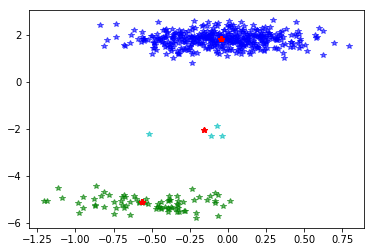

In [18]:
import math
import random
colors = ["#023FA5","#7D87B9","#BEC1D4","#D6BCC0","#BB7784","yellow","#4A6FE3", "#8595E1",
          "#B5BBE3","#E6AFB9","#E07B91","#D33F6A", "#11C638","#8DD593","#C6DEC7","#EAD3C6",
          "#F0B98D","#EF9708","#0FCFC0","#9CDED6","#D5EAE7","#F3E1EB","#F6C4E1","#F79CD4"]

#Parameteres
alpha = 0.8
Sigma_0 = np.array([[1.8, 0], [0,1.8]])
n_points = 500
mu = [0,0]
Sigma = np.array([[0.3, 0], [0, 0.3]])
Prec =  np.linalg.inv(Sigma)
Prec_0 = np.linalg.inv(Sigma_0)

# Initialize data and plot real assignment 
x = generate_clusters(n_points, alpha, Sigma_0, mu, Sigma)

# Initialize random assignment for Gibbs sampling
z = np.array([0]*n_points)
for i in range(n_points):
    z[i] =  random.randint(0,1)

customers_table = []
for k in range(len(list(set(z)))):
    customers_table.append(np.count_nonzero(z == k))
n_clusters = len(customers_table)

sample iteration: 0
sample iteration: 50
number of clusters = 3


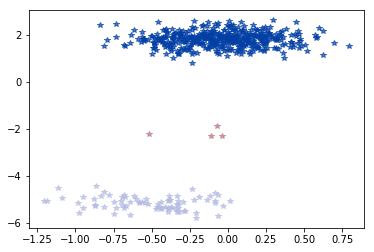

In [19]:
sampling_iter = 100
# Gibbs sampling using CRP_z_x
for s in range(sampling_iter):
    if (s%50) == 0:
        print('sample iteration: ' +str(s))
    for i  in range(n_points):
        z_i = z[i]  
        customers_table[z_i] = customers_table[z_i] - 1 
        if customers_table[z_i] == 0:
            customers_table[z_i] = customers_table[n_clusters - 1]
            z[z== n_clusters - 1] = z_i
            del customers_table[-1]
            n_clusters = n_clusters - 1     
        z[i] = -1
        new_z = CRP_z_x(alpha, z, x, mu, Prec_0, Sigma_0, Prec, Sigma, customers_table)
        if new_z == n_clusters:
            customers_table.append(0)
            n_clusters = n_clusters + 1
        z[i] = new_z
        customers_table[new_z] = customers_table[new_z] + 1
            
for i in range(n_points): 
    plt.plot(x[i][0], x[i][1], colors[(4*z[i]) %len(colors)],  marker='*', alpha=0.7)
print('number of clusters = ' + str(len(set(z))))

## Conclusions
In this Jupyter notebook we have just addressed one of the possible choice for a prior distribution on a infinite set of parameters namely the Dirichlet process in a very specific case: mixture of Gaussian distribution assumption. Anyway the ideas shown here are very general and could be generalized for different setting and different choice of priors or stochastic processes. The other fundamental stochastic process used in Bayesian nonparametric learning are the Gaussian Process and the Indian Buffet Process: a variation on the Chinese Restaurant Process where the same customer can take place in different tables at the same time.

In applied Machine Learning applications of those techniques arise in Text Mining, Natural Language Processing, Computer Vision, Biology, Robotics.
Bayesian nonparametric learning (BNL) is becoming a hot topic in machine learning due to its unique characteristics: BNL offers
a strong theoretical foundation and the ability to generate powerful models in a highly flexible setting. 

As we have seen, standard procedure of BNL comprises two steps: model construction and inference. Model construction can be likened to playing with Legos, where basic stochastic processes are the bricks, and the model is built by
manipulating those bricks, while model inference is a parameter adjustment procedure according to the observed data. The recent advances on both steps have been reviewed, including the popular stochastic processes and their manipulations; the sampling-based and optimisation-based inference algorithms.

Finally toy-example implementations are given to help intuition about the more theoretical statements and explanations. The variables names in the code respects the notation in the explanation and simplicity-brevity were preferred to performance: anyway the code is tested and is very fast; the whole notebooks runs in less than a minute with thousand of data points. Any one is encouraged to play with this implementations and run them with different initial setting and parameters: in particular, what happens if one changes the value of the parameter $\alpha$?  Can we know in advance what will happen? 

## References
(For the very first introduction and conclusions)
- *A survey on Bayesian Nonparametric Learning* - J. Xuan, G. Zhang

(For the formal introduction)
- *A tutorial on Bayesian Nonparametric Models* -  J.Gershman, D. Blei
- *Lecture notes on Bayesian Nonparametric* - P Orbanz

(For the main part treatment)
- *Nonparametric Bayesian Methods: Models, Algorithms, and Applications II* <br>
<a href="http://mlss.tuebingen.mpg.de/2015/speakers.html" target="_blank" >
T. Broderick material </a>  <br>
<a href=" https://www.youtube.com/watch?v=yfLoxwjCGNY" target="_blank" >
 M. Jordan Lesson on Random measures </a> -

(For some measure theoretic foundations)
- *Fundamentals of Nonparametric inference* - S. Ghosal, A. van der Vaart

(The code)
- The code is original; the Gibbs sample implementation is inspired to the :
<a href="https://github.com/tbroderick/mlss2015_bnp_tutorial/blob/master/ex6_sampler.R" target="_blank" >
R implementation of T. Broderick </a>

(Some Proposition and Definitions: Gibbs Sampling, Chinese Process, Random Process, Polya Urn, ..)
- <a href="https://jwmi.github.io/publications/CRP-from-stick-breaking.pdf" target="_blank" >
*An elementary derivation of the Chinese restaurant process from Sethuraman’s stick-breaking process* - Jeffrey W. Miller </a>
- <a href="http://www.columbia.edu/~jwp2128/Teaching/E6892/papers/SimpleProof.pdf" target="_blank" >
*A Simple Proof of the Stick-Breaking Construction of the Dirichlet Process* - John Paisley  </a>
- Wikipedia 